In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.txt',sep=' ',header=None)
test=pd.read_csv('test.txt',sep=' ',header=None)
testclass=test.iloc[:,2:]

In [3]:
train

,0,1,2
0,2,2,1
1,3,1,1
2,-4,3,2
3,3,3,1
4,-1,-3,1
5,2,6,2
6,4,2,1
7,-2,-2,1
8,0,0,2
9,-2,2,2


In [4]:
test

,0,1,2
0,-1,-5,1
1,3,2,1
2,-2,1,2
3,8,2,1
4,6,-1,1
5,0,2,1
6,-3,0,2


In [5]:
test=test.iloc[:,0:2]

In [6]:
test

,0,1
0,-1,-5
1,3,2
2,-2,1
3,8,2
4,6,-1
5,0,2
6,-3,0


In [7]:
class1=train[train[2]==1]
class2=train[train[2]==2]

In [8]:
class1

,0,1,2
0,2,2,1
1,3,1,1
3,3,3,1
4,-1,-3,1
6,4,2,1
7,-2,-2,1


In [9]:
class1=class1.iloc[:,0:2]
class2=class2.iloc[:,0:2]

In [10]:
class1

,0,1
0,2,2
1,3,1
3,3,3
4,-1,-3
6,4,2
7,-2,-2


In [11]:
class2

,0,1
2,-4,3
5,2,6
8,0,0
9,-2,2
10,-1,-1
11,-4,2


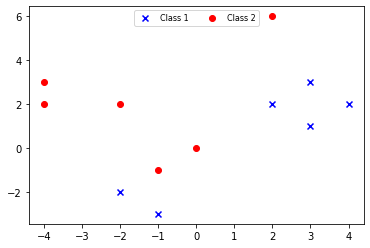

In [12]:
colors = ['b', 'r']
cl1= plt.scatter(class1[0], class1[1], marker='x', color=colors[0])
cl2= plt.scatter(class2[0], class2[1], marker='o', color=colors[1])

plt.legend((cl1, cl2),
           ('Class 1', 'Class 2'),
           scatterpoints=1,
           loc='upper center',
           ncol=3,
           fontsize=8)

plt.show()

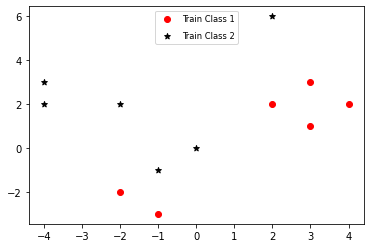

<Figure size 1080x576 with 0 Axes>

In [13]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,8))

ax.scatter(class1[0], class1[1],marker='o',color='r',label='Train Class 1')
ax.scatter(class2[0], class2[1],marker='*',color='k',label='Train Class 2')
legend = ax.legend(loc='upper center', shadow=False, fontsize='small',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

In [14]:
np.mean(class1)

0    1.5
1    0.5
dtype: float64

In [15]:
np.mean(class2)

0   -1.5
1    2.0
dtype: float64

In [16]:
meanClass1= [1.5, 0.5]
meanClass2=[-1.5, 2.0]

In [17]:
meanClass1

[1.5, 0.5]

In [18]:
test=test.to_numpy()

In [19]:
test

array([[-1, -5],
       [ 3,  2],
       [-2,  1],
       [ 8,  2],
       [ 6, -1],
       [ 0,  2],
       [-3,  0]], dtype=int64)

In [24]:
(np.dot([-1, -5],meanClass1)-.5*np.dot(meanClass1,meanClass1)).shape

()

In [20]:
np.dot(np.transpose([-1, -5]),meanClass1)-.5*np.dot(np.transpose(meanClass1),meanClass1)

-5.25

In [21]:
np.dot(np.transpose([-1, -5]),meanClass2)-.5*np.dot(np.transpose(meanClass2),meanClass2)

-11.625

In [22]:
predicted=[]
for i in range(len(test)):
    
    temp1=np.dot(np.transpose(test[i]),meanClass1) - 0.5*np.dot(np.transpose(meanClass1),meanClass1)
    temp2=np.dot(np.transpose(test[i]),meanClass2) - 0.5*np.dot(np.transpose(meanClass2),meanClass2)
    
    if temp1>temp2:
        predicted.append(1)          
    else:
        predicted.append(2) 

In [23]:
predicted

[1, 1, 2, 1, 1, 2, 2]

In [24]:
test1=[]
test2=[]
for i in range(len(predicted)):
    
    if predicted[i]==1:
        test1.append(test[i])
    else:
        test2.append(test[i])

In [25]:
test1

[array([-1, -5], dtype=int64),
 array([3, 2], dtype=int64),
 array([8, 2], dtype=int64),
 array([ 6, -1], dtype=int64)]

In [26]:
test2

[array([-2,  1], dtype=int64),
 array([0, 2], dtype=int64),
 array([-3,  0], dtype=int64)]

In [27]:
test

array([[-1, -5],
       [ 3,  2],
       [-2,  1],
       [ 8,  2],
       [ 6, -1],
       [ 0,  2],
       [-3,  0]], dtype=int64)

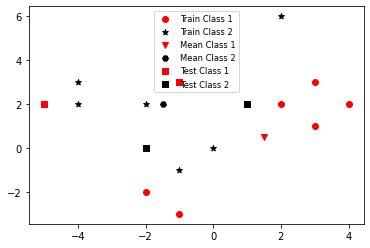

<Figure size 1080x576 with 0 Axes>

In [28]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,8))

ax.scatter(class1[0], class1[1],marker='o',color='r',label='Train Class 1')
ax.scatter(class2[0], class2[1],marker='*',color='k',label='Train Class 2')

ax.scatter(meanClass1[0], meanClass1[1],marker='v',color='r',label='Mean Class 1')
ax.scatter(meanClass2[0], meanClass2[1],marker='H',color='k',label='Mean Class 2')
ax.scatter(test1[0], test1[1],marker='s',color='r',label='Test Class 1')
ax.scatter(test2[0], test2[1],marker='s',color='k',label='Test Class 2')
legend = ax.legend(loc='upper center', shadow=False, fontsize='small',labelspacing=0.5)
legend.get_frame().set_facecolor('None')
plt.show()

In [29]:
import math

In [30]:
X=[]
Y=[]
for x in range(-20,20):
    for y in range(-20,20):
        temp1=np.dot(np.transpose(np.array([x,y])),meanClass1) -.5*np.dot(np.transpose(meanClass1),meanClass1)
        temp2=np.dot(np.transpose(np.array([x,y])),meanClass2)-.5*np.dot(np.transpose(meanClass2),meanClass2)

        if math.floor(temp1)-math.floor(temp2)==0:
            
            X.append(x)
            Y.append(y)
            

In [31]:
print(X)
print(Y)

[-9, -7, -5, -3, -1, 1, 3, 5, 7, 9]
[-17, -13, -9, -5, -1, 3, 7, 11, 15, 19]


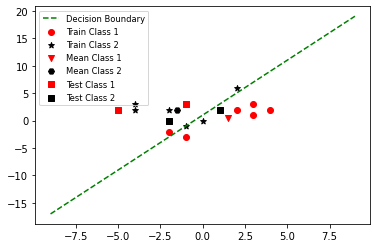

<Figure size 1080x576 with 0 Axes>

In [39]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,8))
ax.plot(X,Y,"--",label='Decision Boundary',color="g")

ax.scatter(class1[0], class1[1],marker='o',color='r',label='Train Class 1')
ax.scatter(class2[0], class2[1],marker='*',color='k',label='Train Class 2')

ax.scatter(meanClass1[0], meanClass1[1],marker='v',color='r',label='Mean Class 1')
ax.scatter(meanClass2[0], meanClass2[1],marker='H',color='k',label='Mean Class 2')
ax.scatter(test1[0], test1[1],marker='s',color='r',label='Test Class 1')
ax.scatter(test2[0], test2[1],marker='s',color='k',label='Test Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.5)
legend.get_frame().set_facecolor('None')
plt.show()

In [33]:
testclass

,2
0,1
1,1
2,2
3,1
4,1
5,1
6,2


In [34]:
testclass=[1,1,2,1,1,1,2]

In [35]:
testclass,predicted

([1, 1, 2, 1, 1, 1, 2], [1, 1, 2, 1, 1, 2, 2])

In [36]:
correct=0
for i in range(len(testclass)):
    if testclass[i]==predicted[i]:
        correct+=1
accuracy=correct/len(testclass)
accuracy


0.8571428571428571